In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise
noisy_matrix[1,1]=np.nan
# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.07448558 0.06014766 0.0608914  ... 0.05587342 0.04004523 0.06934607]
 [0.14830217 0.11975511 0.12123592 ... 0.11124502 0.07973081 0.13806933]
 [0.28726028 0.23196482 0.23483315 ... 0.21548084 0.15443803 0.26743934]
 ...
 [0.69826798 0.56385659 0.57082888 ... 0.52378758 0.37540564 0.65008752]
 [0.36837957 0.29746925 0.30114756 ... 0.27633036 0.19804971 0.3429614 ]
 [0.68279995 0.55136604 0.55818388 ... 0.51218464 0.36708966 0.63568679]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.04109747  0.08641911  0.01610718 ...  0.07414243 -0.04028959
   0.0142656 ]
 [ 0.17724983         nan  0.01589069 ...  0.06190561  0.12269564
   0.00290782]
 [ 0.35413546  0.18858002  0.32438479 ...  0.0819224   0.11075578
   0.49644044]
 ...
 [ 0.54904577  0.59567809  0.46976344 ...  0.3578661   0.57738047
   0.48774031]
 [ 0.34052993  0.24182959  0.32549595 ...  0.21740474  0.07925286
   0.32220153]
 [ 0.66069129  0.55024829  0.41432794 ...  0.46837314  0.24300695
   0.55

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver")
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine")
from cEBMF import *

In [3]:

noisy_matrix[1,1]=np.nan
imputed_data = IterativeSVD().fit_transform(noisy_matrix)
 

U, s, Vt = np.linalg.svd(imputed_data , full_matrices=False)
 

mycebmf= cEBMF(data= noisy_matrix,
               prior_L = "norm",
               prior_F = "norm")
K=5
K=5

[IterativeSVD] Iter 1: observed MAE=0.079616
[IterativeSVD] Iter 2: observed MAE=0.076104
[IterativeSVD] Iter 3: observed MAE=0.070115
[IterativeSVD] Iter 4: observed MAE=0.058574
[IterativeSVD] Iter 5: observed MAE=0.053319
[IterativeSVD] Iter 6: observed MAE=0.053318
[IterativeSVD] Iter 7: observed MAE=0.053318


c:\Users\WD\anaconda3\envs\torch_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\WD\anaconda3\envs\torch_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\WD\anaconda3\envs\torch_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])
print(mycebmf.K)

Initializing using Iterative SVD due to missing values.
[IterativeSVD] Iter 1: observed MAE=0.079616
[IterativeSVD] Iter 2: observed MAE=0.076104
[IterativeSVD] Iter 3: observed MAE=0.070115
[IterativeSVD] Iter 4: observed MAE=0.058574
[IterativeSVD] Iter 5: observed MAE=0.053319
[IterativeSVD] Iter 6: observed MAE=0.053318
[IterativeSVD] Iter 7: observed MAE=0.053318
[-0.13785456  0.29927135 -0.18308845 -0.00831193 -0.1195168  -0.16188096
 -0.0963693  -0.01431762  0.03122184 -0.12116521  0.11448051  0.02840513
  0.01971778  0.01796806 -0.13479161  0.1726367  -0.21869095  0.05055032
 -0.26237336 -0.13102475 -0.43359718  0.1748442   0.15314184 -0.3057858
  0.07213554  0.03021433  0.04054053  0.18698524  0.11991557 -0.11807665
 -0.13865902  0.4117454  -0.24708655 -0.17950633 -0.09067987 -0.39141703
 -0.13616659 -0.06623278  0.25610855 -0.09616     0.15275083 -0.30769557
 -0.16096634  0.06250086 -0.05775882 -0.11746005  0.14266865  0.350391
 -0.05359479 -0.12200122]
[-0.20632921  0.181352

c:\Users\WD\anaconda3\envs\torch_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\WD\anaconda3\envs\torch_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\WD\anaconda3\envs\torch_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


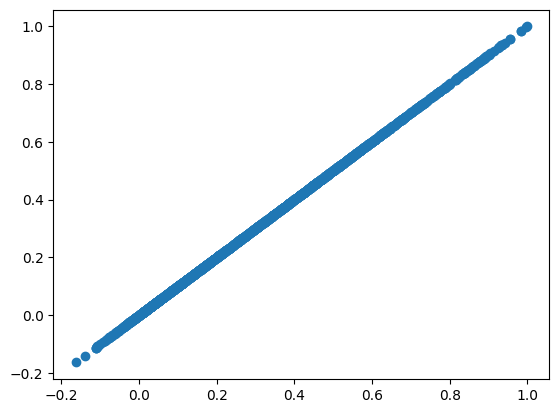

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

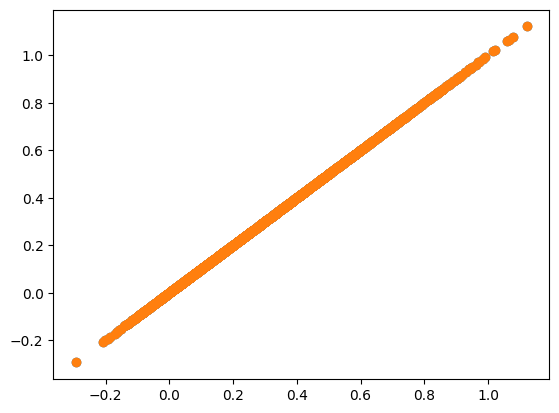

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
1/mycebmf.tau

array([[0.00706502, 0.00706502, 0.00706502, ..., 0.00706502, 0.00706502,
        0.00706502],
       [0.00706502, 0.00706502, 0.00706502, ..., 0.00706502, 0.00706502,
        0.00706502],
       [0.00706502, 0.00706502, 0.00706502, ..., 0.00706502, 0.00706502,
        0.00706502],
       ...,
       [0.00706502, 0.00706502, 0.00706502, ..., 0.00706502, 0.00706502,
        0.00706502],
       [0.00706502, 0.00706502, 0.00706502, ..., 0.00706502, 0.00706502,
        0.00706502],
       [0.00706502, 0.00706502, 0.00706502, ..., 0.00706502, 0.00706502,
        0.00706502]], shape=(50, 40), dtype=float32)

In [9]:
 
mycebmf.update_loading_factor_k(k=0)

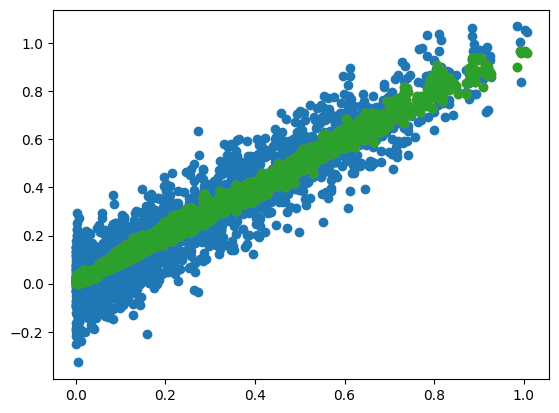

In [10]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

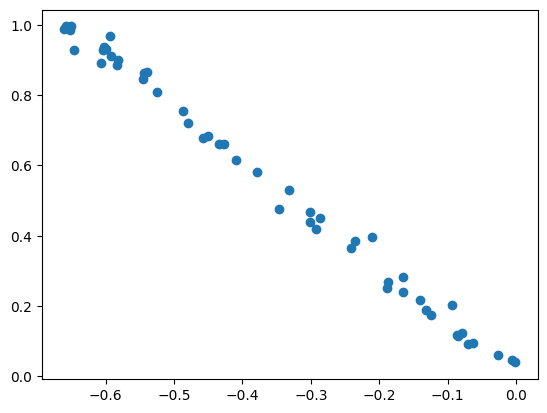

In [11]:
plt.scatter(mycebmf.L[:,0], u)

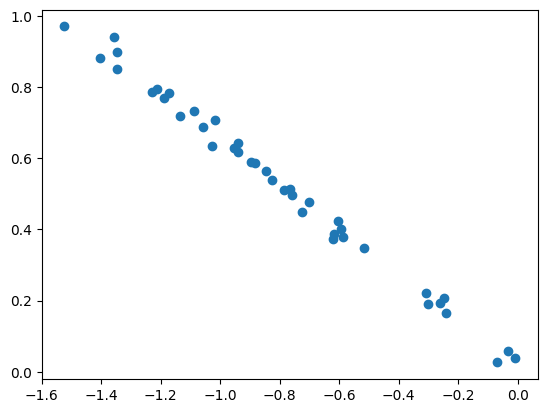

In [12]:
plt.scatter(mycebmf.F[:,0], v)

In [13]:
np.zeros_like(range(10))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
mycebmf.kl_l

array([  34,  -94,  -98, -100, -100])

In [15]:
k=1

mycebmf.cal_partial_residuals(k=k)
lhat , s_l  = compute_hat_l_and_s_l(Z =mycebmf.Rk,
                                                            nu =mycebmf.F[:,k] ,
                                                            omega=mycebmf.F2[:,k], 
                                                            tau=mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
     
ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     ="norm",
                      verbose=False
                      )
mycebmf.L  [:,k] =ash_obj.post_mean
mycebmf.L2 [:,k] =ash_obj.post_mean2
        
mycebmf.kl_f[k]=  normal_means_loglik(lhat , 
                                           s_l,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )
        
fhat , s_f  = compute_hat_f_and_s_f(Z =mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  ,
                                                            has_nan=mycebmf.has_nan)
ash_obj = ash(betahat   = fhat, 
                      sebetahat = s_f ,
                      prior     = "norm",
                      verbose=False
                      )
mycebmf.F  [:,k] =ash_obj.post_mean
mycebmf.F2 [:,k] =ash_obj.post_mean2
mycebmf.kl_f[k]=  normal_means_loglik(fhat , 
                                           s_f,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )

In [16]:
mycebmf.prior_L

<function cEBMF.prior_norm(X, betahat, sebetahat, model_param)>

In [17]:
normal_means_loglik(fhat , 
                                           s_f,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )

np.float64(-308.18988845896615)

In [27]:
mycebmf.tau

array([[100.797386, 100.797386, 100.797386, ..., 100.797386, 100.797386,
        100.797386],
       [100.797386, 100.797386, 100.797386, ..., 100.797386, 100.797386,
        100.797386],
       [100.797386, 100.797386, 100.797386, ..., 100.797386, 100.797386,
        100.797386],
       ...,
       [100.797386, 100.797386, 100.797386, ..., 100.797386, 100.797386,
        100.797386],
       [100.797386, 100.797386, 100.797386, ..., 100.797386, 100.797386,
        100.797386],
       [100.797386, 100.797386, 100.797386, ..., 100.797386, 100.797386,
        100.797386]], shape=(50, 40), dtype=float32)

In [19]:
mycebmf.iter()

print(mycebmf.kl_l)
print(mycebmf.kl_f  )


[ 34 -78 -98 -93 -99]
[ 60 297 313 309 313]


In [20]:
print( -0.5*np.sum (mycebmf.n_nonmissing* (np.log( 2*np.pi ) - np.log(mycebmf.tau[0,0] + 1e-32)+ 1 )))
print(mycebmf.kl_l  )
print(mycebmf.kl_f  )
print(mycebmf.tau[0,0] )
print( np.sum(mycebmf.kl_l+mycebmf.kl_f)-0.5*np.sum (mycebmf.n_nonmissing* np.log( 2*np.pi ) - np.log(mycebmf.tau[0,0] + 1e-32)+ 1 ))
print(mycebmf.obj)

1774.355867723606
[ 34 -78 -98 -93 -99]
[ 60 297 313 309 313]
100.79822
-877.1515675982018
[inf, np.float64(2762.1346300641517), np.float64(2732.355867723606)]


In [21]:
mycebmf.iter()
print(mycebmf.obj)

[inf, np.float64(2762.1346300641517), np.float64(2732.355867723606), np.float64(2741.3477655450324)]


In [22]:
for i in range(80):
    mycebmf.iter()



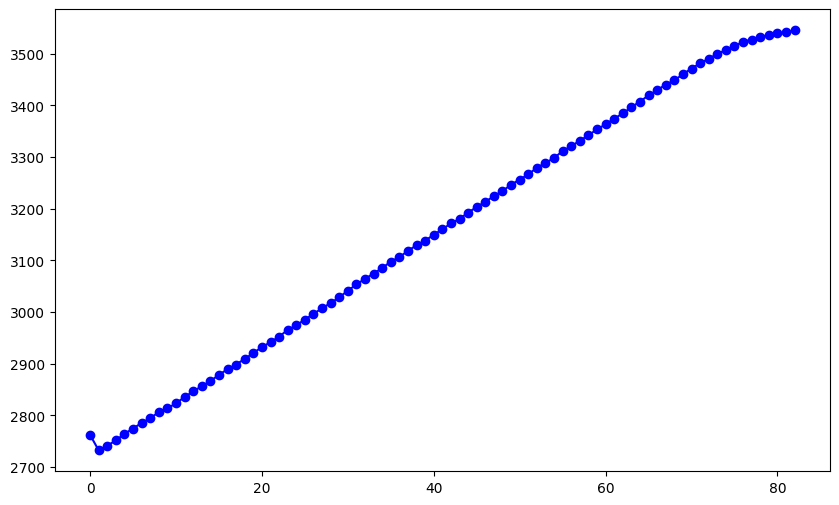

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

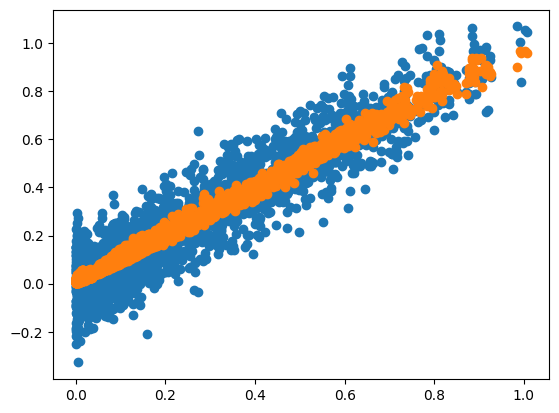

In [26]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
